# Salary_hike -> Build a prediction model for Salary_hike


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Salary_Data.csv') 

In [4]:
df.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()  

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


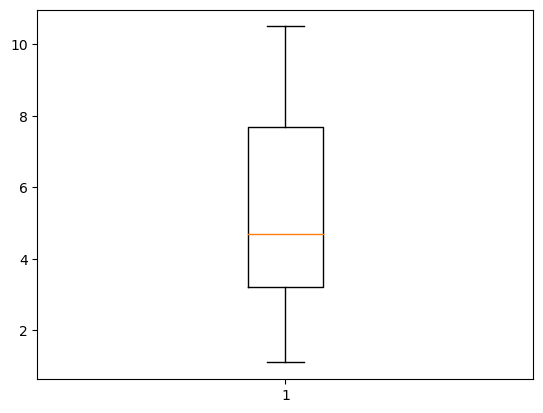

In [7]:
plt.boxplot(df["YearsExperience"]) 
plt.show() 

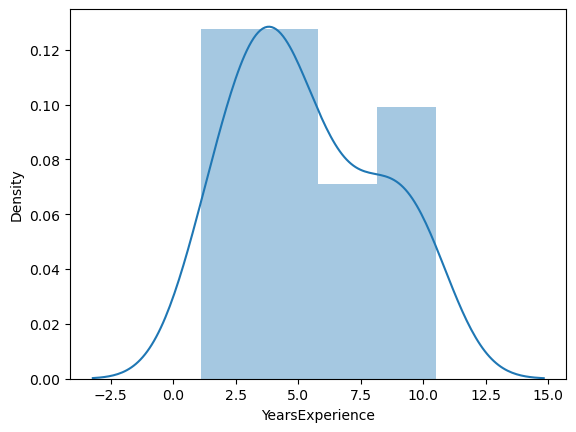

In [9]:
sns.distplot(df["YearsExperience"]) 
plt.show() 

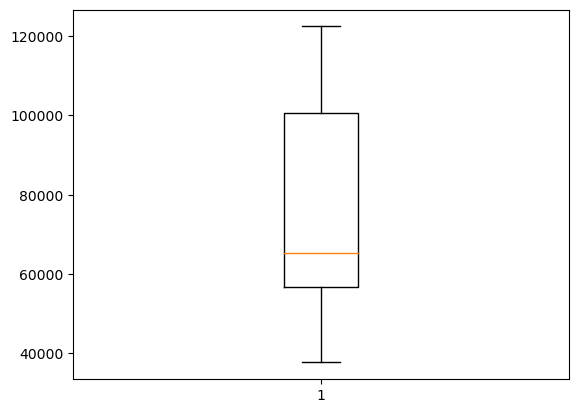

In [10]:
plt.boxplot(df["Salary"]) 
plt.show() 

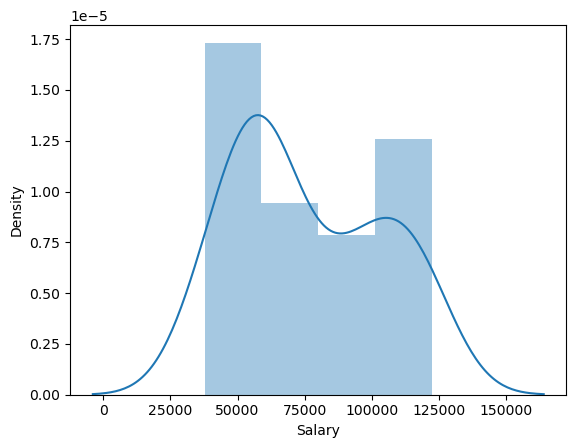

In [11]:
sns.distplot(df["Salary"]) 
plt.show() 

Text(0.5, 1.0, 'ScatterPlot')

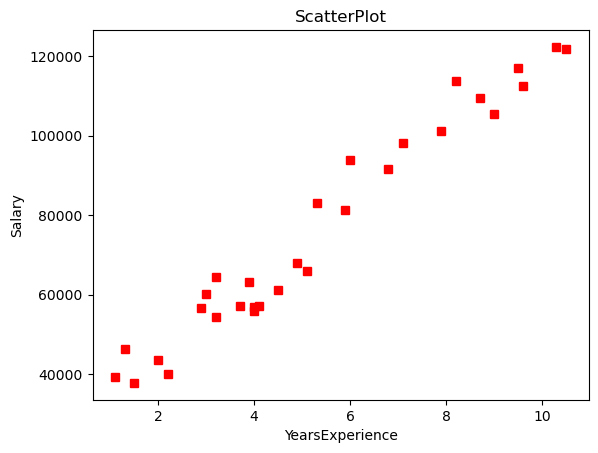

In [12]:
plt.plot(df['YearsExperience'],df['Salary'],"rs")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("ScatterPlot") 

In [13]:
df.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
# model building - 1
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit() 
model.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
model.summary() # we got R-sqr val =0.975

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        13:12:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred = model.predict(df.YearsExperience)   

In [20]:
pred 

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [21]:
model.resid 

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

Text(0, 0.5, 'Salary')

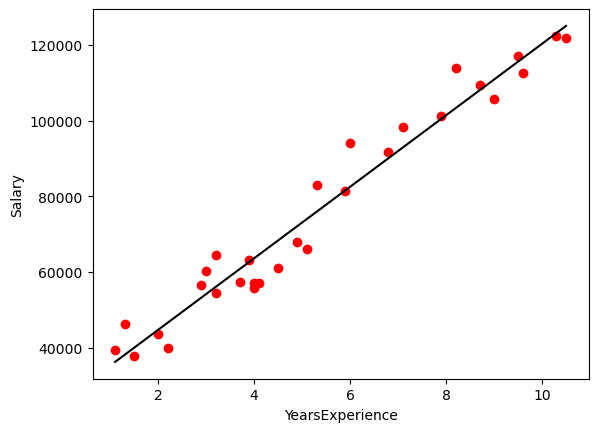

In [22]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red')
plt.plot(df['YearsExperience'],pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')    

In [24]:
rmse = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred))**2)) 
rmse 

5592.043608760662

In [25]:
# model2 

In [26]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit()  

In [27]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        13:20:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred2 = model.predict(df.YearsExperience)   

In [29]:
pred2 

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [30]:
model2.resid 

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [31]:
rmse = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2)) 
rmse 

5592.043608760662

In [32]:
pred2.corr(df.Salary)  

0.9782416184887601

In [33]:
pred.corr(df.Salary)  

0.9782416184887601

Text(0, 0.5, 'Salary')

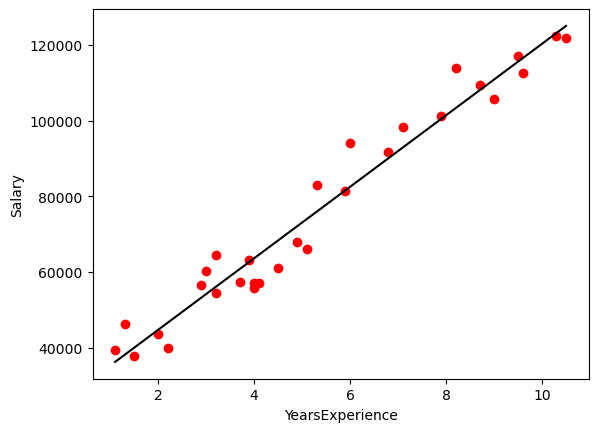

In [34]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red')
plt.plot(df['YearsExperience'],pred2,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')    

In [35]:
# we got R -sqr value less compared to model 1 
# so we are considering model 1 which has more R-sqr value i.e 0.975 

In [37]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=df).fit()  

In [38]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        13:35:18   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""